In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

node = "MA_C1504"  # Adjust as needed
filestem = "mid_freq/MA_C1504"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True,  # using whitespace since your file preview has space separation
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

**********************************
Beginning quick node plotter for: MA_C1504/mid_freq/MA_C1504
**********************************


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_56168/35795687.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  unblanked_bliss_results = pd.read_csv(


Number of hits:  46


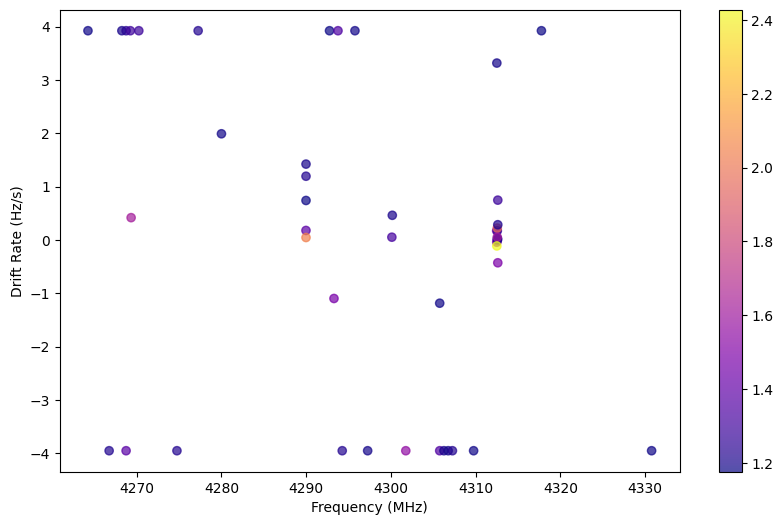

In [3]:
print("Number of hits: ", len(unblanked_bliss_results))

fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)

In [4]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",         
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=5))

fig.show()


Number of hits:  46


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4264.250599  , 4264.91558718, 4265.58057536, 4266.24556354,
        4266.91055172, 4267.5755399 , 4268.24052808, 4268.90551626,
        4269.57050444, 4270.23549262, 4270.9004808 , 4271.56546898,
        4272.23045716, 4272.89544534, 4273.56043352, 4274.2254217 ,
        4274.89040988, 4275.55539806, 4276.22038624, 4276.88537442,
        4277.5503626 , 4278.21535078, 4278.88033896, 4279.54532714,
        4280.21031532, 428

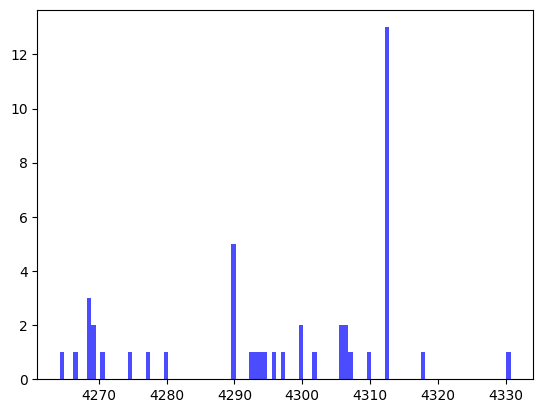

In [5]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [6]:
# define frequency ranges to blank, in MHz

blanking_ranges = [[4144,4178],[4190,4201],
                   ]

drift_ranges = [[-0.05,0.05]]

# remove hits in blanked ranges
for range in blanking_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Uncorrected_Frequency"].between(range[0], range[1])]
for range in drift_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Drift_Rate"].between(range[0], range[1])]

Number of hits:  41


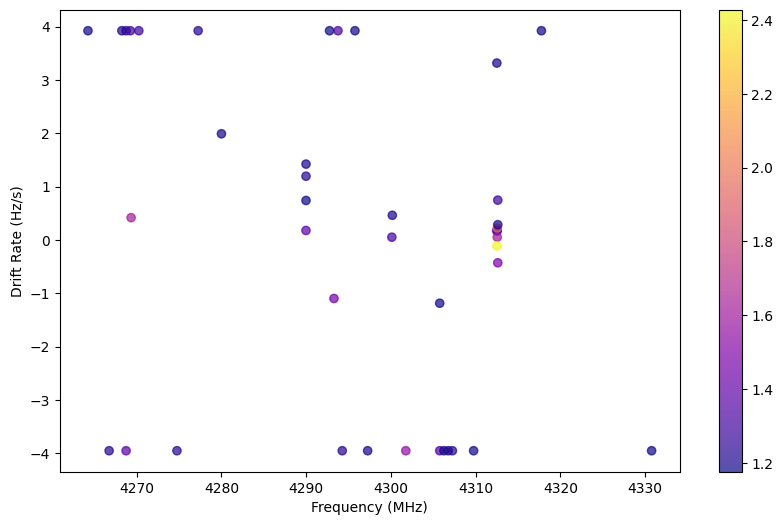

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)
print("Number of hits: ", len(unblanked_bliss_results))

(array([1., 0., 0., 1., 0., 0., 3., 2., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 4., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 2., 2., 1., 0., 0., 0.,
        1., 0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([4264.250599  , 4264.91558718, 4265.58057536, 4266.24556354,
        4266.91055172, 4267.5755399 , 4268.24052808, 4268.90551626,
        4269.57050444, 4270.23549262, 4270.9004808 , 4271.56546898,
        4272.23045716, 4272.89544534, 4273.56043352, 4274.2254217 ,
        4274.89040988, 4275.55539806, 4276.22038624, 4276.88537442,
        4277.5503626 , 4278.21535078, 4278.88033896, 4279.54532714,
        4280.21031532, 4280.8753035 , 4281.54029168, 4282.20527986,
        4282.87026804, 4283.53525622, 4284.2002444 , 4284.86523258,
      

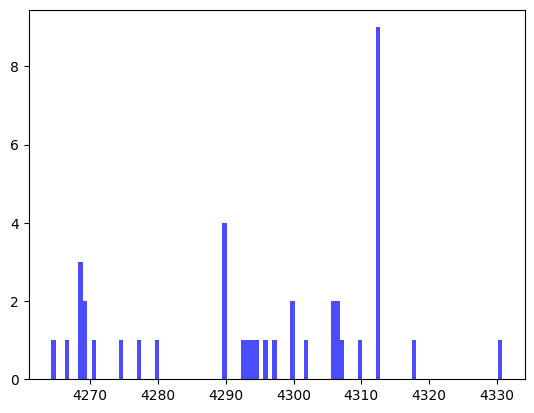

In [8]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
         3.,  2.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([-3.953776  , -3.87501628, -3.79625656, -3.71749684, -3.63873712,
        -3.5599774 , -3.48121768, -3.40245796, -3.32369824, -3.24493852,
        -3.1661788 , -3.08741908, -3.00865936, -2.92989964, -2.85113992,
        -2.7723802 , -2.69362048, -2.61486076, -2.53610104, -2.45734132,
        -2.3785816 , -2.29982188, -2.22106216, -2.14230244, -2.06354272,
        -1.984783  , -1.90602328, -1.82726356, -1.74850384, -1.669744

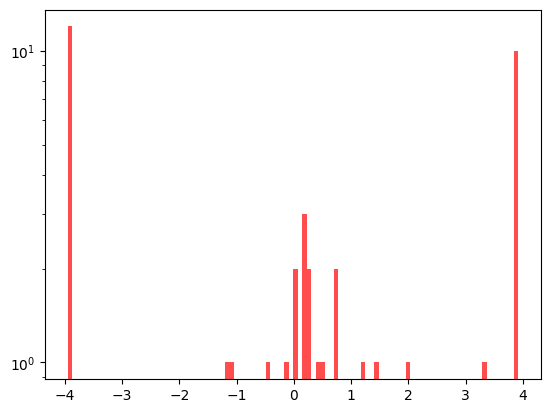

In [9]:
plt.hist(unblanked_bliss_results['Drift_Rate'], log=True, bins=100, color='red', alpha=0.7)

In [ ]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",       
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=5))

fig.show()

Number of hits:  41
